In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.9.1


In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
from collections import OrderedDict

In [6]:
# for visualization
from PIL import Image

In [7]:
# for identify faces
from mtcnn.mtcnn import MTCNN

In [8]:
# for bounding boxes
import matplotlib.patches as patches

In [9]:
# CNN
import keras
from sklearn.model_selection import train_test_split

In [10]:
# for moving files
import shutil
from shutil import unpack_archive
from subprocess import check_output

## Data Intake

In [11]:
dataset_path = "../../data/Labelled-Faces-in-the-Wild-LFW/"

In [12]:
lfw_allnames = pd.read_csv(dataset_path + "lfw_allnames.csv")
lfw_allnames

,name,images
0,AJ_Cook,1
1,AJ_Lamas,1
2,Aaron_Eckhart,1
3,Aaron_Guiel,1
4,Aaron_Patterson,1
...,...,...
5744,Zorica_Radovic,1
5745,Zulfiqar_Ahmed,1
5746,Zumrati_Juma,1
5747,Zurab_Tsereteli,1


In [13]:
lfw_allnames.loc[lfw_allnames['name'].str.contains("Bush")]

,name,images
1055,Columba_Bush,1
1854,George_HW_Bush,13
1862,George_P_Bush,2
1871,George_W_Bush,530
2477,Jeb_Bush,12
3202,Laura_Bush,41
4108,Noelle_Bush,4


In [14]:
lfw_allnames.loc[lfw_allnames['name'] == "Columba_Bush"]

,name,images
1055,Columba_Bush,1


In [15]:
lfw_allnames.loc[lfw_allnames['name'] == "Abdullatif_Sener"]

,name,images
23,Abdullatif_Sener,2


In [16]:
matchpairsDevTest = pd.read_csv(dataset_path + "matchpairsDevTest.csv")
matchpairsDevTest

,name,imagenum1,imagenum2
0,Abdullah_Gul,13,14
1,Abdullah_Gul,13,16
2,Abdullatif_Sener,1,2
3,Adel_Al-Jubeir,1,3
4,Al_Pacino,1,2
...,...,...,...
495,Winona_Ryder,6,15
496,Winona_Ryder,19,21
497,Yevgeny_Kafelnikov,3,4
498,Yoriko_Kawaguchi,3,10


In [17]:
matchpairsDevTest.loc[matchpairsDevTest['name'] == "Abdullatif_Sener"]

,name,imagenum1,imagenum2
2,Abdullatif_Sener,1,2


In [18]:
matchpairsDevTest.loc[matchpairsDevTest['name'] == "Winona_Ryder"]

,name,imagenum1,imagenum2
495,Winona_Ryder,6,15
496,Winona_Ryder,19,21


In [19]:
matchpairsDevTrain = pd.read_csv(dataset_path + "matchpairsDevTrain.csv")
matchpairsDevTrain

,name,imagenum1,imagenum2
0,Aaron_Peirsol,1,2
1,Aaron_Peirsol,3,4
2,Aaron_Sorkin,1,2
3,Abdel_Nasser_Assidi,1,2
4,Abdullah,1,3
...,...,...,...
1095,Zhu_Rongji,1,9
1096,Zhu_Rongji,4,7
1097,Zhu_Rongji,4,8
1098,Zhu_Rongji,5,6


In [20]:
mismatchpairsDevTest = pd.read_csv(dataset_path + "mismatchpairsDevTest.csv")
mismatchpairsDevTest

,name,imagenum1,name.1,imagenum2
0,AJ_Lamas,1,Zach_Safrin,1
1,Aaron_Guiel,1,Reese_Witherspoon,3
2,Aaron_Tippin,1,Jose_Luis_Rodriguez_Zapatero,1
3,Abdul_Majeed_Shobokshi,1,Charles_Cope,1
4,Abdullah_Gul,16,Steve_Cox,1
...,...,...,...,...
495,Susan_Whelan,1,Wolfgang_Schneiderhan,1
496,Takeo_Fukui,1,Will_Ofenheusle,1
497,Tamara_Mowry,1,Zach_Parise,1
498,Tatiana_Kennedy_Schlossberg,1,Thomas_Watjen,1


In [21]:
mismatchpairsDevTrain = pd.read_csv(dataset_path + "mismatchpairsDevTrain.csv")
mismatchpairsDevTrain

,name,imagenum1,name.1,imagenum2
0,AJ_Cook,1,Marsha_Thomason,1
1,Aaron_Sorkin,2,Frank_Solich,5
2,Abdel_Nasser_Assidi,2,Hilary_McKay,1
3,Abdoulaye_Wade,4,Linda_Dano,1
4,Abdul_Rahman,1,Magui_Serna,1
...,...,...,...,...
1095,Tom_Vilsack,1,Wayne_Ferreira,5
1096,Trisha_Meili,1,Vladimiro_Montesinos,3
1097,Ty_Votaw,1,Wayne_Allard,1
1098,Vytas_Danelius,1,Zaini_Abdullah,1


In [22]:
pairs = pd.read_csv(dataset_path + "pairs.csv")
pairs

,name,imagenum1,imagenum2,Unnamed: 3
0,Abel_Pacheco,1,4,NaN
1,Akhmed_Zakayev,1,3,NaN
2,Akhmed_Zakayev,2,3,NaN
3,Amber_Tamblyn,1,2,NaN
4,Anders_Fogh_Rasmussen,1,3,NaN
...,...,...,...,...
5995,Scott_Wolf,2,Troy_Polamalu,1.0
5996,Sergei_Alexandrovitch_Ordzhonikidze,1,Yolanda_King,1.0
5997,Shane_Loux,1,Val_Ackerman,1.0
5998,Shawn_Marion,1,Shirley_Jones,1.0


In [23]:
# Generate complete matched and mismatched pairs from above pairs df
pairs = pairs.rename(columns = {'name':'name1', 'Unnamed: 3':'name2'})
matched_pairs = pairs[pairs["name2"].isnull()].drop("name2", axis=1)
mismatched_pairs = pairs[pairs["name2"].notnull()]

In [24]:
matched_pairs

,name1,imagenum1,imagenum2
0,Abel_Pacheco,1,4
1,Akhmed_Zakayev,1,3
2,Akhmed_Zakayev,2,3
3,Amber_Tamblyn,1,2
4,Anders_Fogh_Rasmussen,1,3
...,...,...,...
5695,Vladimir_Voltchkov,1,2
5696,Wang_Yi,1,2
5697,Zafarullah_Khan_Jamali,1,2
5698,Zhu_Rongji,1,3


In [25]:
mismatched_pairs = mismatched_pairs.rename(columns = {'imagenum2':'name2', 'name2':'imagenum2'})
mismatched_pairs

,name1,imagenum1,name2,imagenum2
300,Abdel_Madi_Shabneh,1,Dean_Barker,1.0
301,Abdel_Madi_Shabneh,1,Giancarlo_Fisichella,1.0
302,Abdel_Madi_Shabneh,1,Mikhail_Gorbachev,1.0
303,Abdul_Rahman,1,Portia_de_Rossi,1.0
304,Abel_Pacheco,1,Jong_Thae_Hwa,2.0
...,...,...,...,...
5995,Scott_Wolf,2,Troy_Polamalu,1.0
5996,Sergei_Alexandrovitch_Ordzhonikidze,1,Yolanda_King,1.0
5997,Shane_Loux,1,Val_Ackerman,1.0
5998,Shawn_Marion,1,Shirley_Jones,1.0


In [26]:
people = pd.read_csv(dataset_path + "people.csv")
people

,name,images
0,Abdel_Madi_Shabneh,1.0
1,Abdul_Rahman,1.0
2,Abel_Pacheco,4.0
3,Adriana_Lima,1.0
4,Afton_Smith,1.0
...,...,...
5753,Yves_Brodeur,1.0
5754,Zach_Pillar,1.0
5755,Zafarullah_Khan_Jamali,2.0
5756,Zara_Akhmadova,1.0


In [27]:
people.loc[people['name'] == 'George_W_Bush']

,name,images
5355,George_W_Bush,530.0


In [28]:
peopleDevTest = pd.read_csv(dataset_path + "peopleDevTest.csv")
peopleDevTest.shape

(1711, 2)

In [29]:
peopleDevTrain = pd.read_csv(dataset_path + "peopleDevTrain.csv")
peopleDevTrain.shape

(4038, 2)

In [30]:
peopleDevTest.ndim

2

## Data Shaping

In [31]:
image_paths = lfw_allnames.loc[lfw_allnames.index.repeat(lfw_allnames['images'])]
image_paths['image_path'] = 1 + image_paths.groupby('name').cumcount()
image_paths['image_path'] = image_paths.image_path.apply(lambda x: '{0:0>4}'.format(x))
image_paths['image_path'] = image_paths.name + "/" + image_paths.name + "_" + image_paths.image_path + ".jpg"
image_paths = image_paths.drop("images",axis=1)
image_paths

,name,image_path
0,AJ_Cook,AJ_Cook/AJ_Cook_0001.jpg
1,AJ_Lamas,AJ_Lamas/AJ_Lamas_0001.jpg
2,Aaron_Eckhart,Aaron_Eckhart/Aaron_Eckhart_0001.jpg
3,Aaron_Guiel,Aaron_Guiel/Aaron_Guiel_0001.jpg
4,Aaron_Patterson,Aaron_Patterson/Aaron_Patterson_0001.jpg
...,...,...
5744,Zorica_Radovic,Zorica_Radovic/Zorica_Radovic_0001.jpg
5745,Zulfiqar_Ahmed,Zulfiqar_Ahmed/Zulfiqar_Ahmed_0001.jpg
5746,Zumrati_Juma,Zumrati_Juma/Zumrati_Juma_0001.jpg
5747,Zurab_Tsereteli,Zurab_Tsereteli/Zurab_Tsereteli_0001.jpg


In [32]:
image_paths.loc[image_paths['name'] == 'Zhu_Rongji']

,name,image_path
5738,Zhu_Rongji,Zhu_Rongji/Zhu_Rongji_0001.jpg
5738,Zhu_Rongji,Zhu_Rongji/Zhu_Rongji_0002.jpg
5738,Zhu_Rongji,Zhu_Rongji/Zhu_Rongji_0003.jpg
5738,Zhu_Rongji,Zhu_Rongji/Zhu_Rongji_0004.jpg
5738,Zhu_Rongji,Zhu_Rongji/Zhu_Rongji_0005.jpg
5738,Zhu_Rongji,Zhu_Rongji/Zhu_Rongji_0006.jpg
5738,Zhu_Rongji,Zhu_Rongji/Zhu_Rongji_0007.jpg
5738,Zhu_Rongji,Zhu_Rongji/Zhu_Rongji_0008.jpg
5738,Zhu_Rongji,Zhu_Rongji/Zhu_Rongji_0009.jpg


In [33]:
lfw_allnames.loc[lfw_allnames['name'] == 'Zhu_Rongji']

,name,images
5738,Zhu_Rongji,9


In [34]:
# Create new dataframe where each name is repeated for the number of images indicated for them.
image_paths = lfw_allnames.loc[lfw_allnames.index.repeat(lfw_allnames['images'])]
# E.g. Since Zhu_Rongji has 9 images, repeat it 9 times into image_paths df.
image_paths.loc[image_paths['name'] == 'Zhu_Rongji']

,name,images
5738,Zhu_Rongji,9
5738,Zhu_Rongji,9
5738,Zhu_Rongji,9
5738,Zhu_Rongji,9
5738,Zhu_Rongji,9
5738,Zhu_Rongji,9
5738,Zhu_Rongji,9
5738,Zhu_Rongji,9
5738,Zhu_Rongji,9


In [35]:
# With repeated entries in image_paths, we can group them by 'name' column to each repeated entry to
# increment their corresponding count up to the max per name, e.g. for Zhu_Rongji at index 5738:
image_paths.groupby('name').cumcount()[5738]

5738    0
5738    1
5738    2
5738    3
5738    4
5738    5
5738    6
5738    7
5738    8
dtype: int64

In [36]:
# Since we want each image to be designated starting at 1, e.g.:
#    Zhu_Rongji_0001.jpg
#    Zhu_Rongji_0002.jpg
#    ...
#    Zhu_Rongji_0009.jpg
# Then we can add 1 to each entry's 'image_path' column:
image_paths['image_path'] = 1 + image_paths.groupby('name').cumcount()
image_paths['image_path'][5738] # example entry

5738    1
5738    2
5738    3
5738    4
5738    5
5738    6
5738    7
5738    8
5738    9
Name: image_path, dtype: int64

In [37]:
# Pad zeroes into each of the image_path values.
image_paths['image_path'] = image_paths.image_path.apply(lambda x: '{0:0>4}'.format(x))
image_paths['image_path'][5738] # example entry

5738    0001
5738    0002
5738    0003
5738    0004
5738    0005
5738    0006
5738    0007
5738    0008
5738    0009
Name: image_path, dtype: object

In [38]:
# Create the full relative path that can be used to lookup the actual images.
# E.g. Zhu_Rongji => Zhu_Rongji/Zhu_Rongji_0001.jpg
image_paths['image_path'] = image_paths.name + "/" + image_paths.name + "_" + image_paths.image_path + ".jpg"
image_paths['image_path'][5738] # example entry

5738    Zhu_Rongji/Zhu_Rongji_0001.jpg
5738    Zhu_Rongji/Zhu_Rongji_0002.jpg
5738    Zhu_Rongji/Zhu_Rongji_0003.jpg
5738    Zhu_Rongji/Zhu_Rongji_0004.jpg
5738    Zhu_Rongji/Zhu_Rongji_0005.jpg
5738    Zhu_Rongji/Zhu_Rongji_0006.jpg
5738    Zhu_Rongji/Zhu_Rongji_0007.jpg
5738    Zhu_Rongji/Zhu_Rongji_0008.jpg
5738    Zhu_Rongji/Zhu_Rongji_0009.jpg
Name: image_path, dtype: object

In [39]:
image_paths

,name,images,image_path
0,AJ_Cook,1,AJ_Cook/AJ_Cook_0001.jpg
1,AJ_Lamas,1,AJ_Lamas/AJ_Lamas_0001.jpg
2,Aaron_Eckhart,1,Aaron_Eckhart/Aaron_Eckhart_0001.jpg
3,Aaron_Guiel,1,Aaron_Guiel/Aaron_Guiel_0001.jpg
4,Aaron_Patterson,1,Aaron_Patterson/Aaron_Patterson_0001.jpg
...,...,...,...
5744,Zorica_Radovic,1,Zorica_Radovic/Zorica_Radovic_0001.jpg
5745,Zulfiqar_Ahmed,1,Zulfiqar_Ahmed/Zulfiqar_Ahmed_0001.jpg
5746,Zumrati_Juma,1,Zumrati_Juma/Zumrati_Juma_0001.jpg
5747,Zurab_Tsereteli,1,Zurab_Tsereteli/Zurab_Tsereteli_0001.jpg


In [40]:
image_paths = image_paths.drop("images", axis=1)
image_paths

,name,image_path
0,AJ_Cook,AJ_Cook/AJ_Cook_0001.jpg
1,AJ_Lamas,AJ_Lamas/AJ_Lamas_0001.jpg
2,Aaron_Eckhart,Aaron_Eckhart/Aaron_Eckhart_0001.jpg
3,Aaron_Guiel,Aaron_Guiel/Aaron_Guiel_0001.jpg
4,Aaron_Patterson,Aaron_Patterson/Aaron_Patterson_0001.jpg
...,...,...
5744,Zorica_Radovic,Zorica_Radovic/Zorica_Radovic_0001.jpg
5745,Zulfiqar_Ahmed,Zulfiqar_Ahmed/Zulfiqar_Ahmed_0001.jpg
5746,Zumrati_Juma,Zumrati_Juma/Zumrati_Juma_0001.jpg
5747,Zurab_Tsereteli,Zurab_Tsereteli/Zurab_Tsereteli_0001.jpg


In [41]:
# Partition the dataset into test and train datasets.
lfw_train, lfw_test = train_test_split(image_paths, test_size=0.2)
lfw_train = lfw_train.reset_index().drop('index', axis=1)
lfw_test = lfw_test.reset_index().drop('index', axis=1)

In [42]:
lfw_train.shape

(10586, 2)

In [43]:
lfw_test.shape

(2647, 2)

In [44]:
# Verify that there is a subset of names that are in both test and training datasets.
print(len(set(lfw_train.name).intersection(set(lfw_test.name))))
print(len(set(lfw_test.name) - set(lfw_train.name)))

840
889


In [45]:
basepath = dataset_path + 'lfw-deepfunneled/'
basepath

'../../data/Labelled-Faces-in-the-Wild-LFW/lfw-deepfunneled/'

In [46]:
# Verify that each image has the correct resolution before processing further.
widths = []
heights = []
files = image_paths.image_path
for file in files:
    path = basepath + str(file)
    img = Image.open(path)
    widths.append(img.width)
    heights.append(img.height)

# This should show that all images are 250x250
pd.DataFrame({'width':widths, 'height':heights}).describe()

,width,height
count,13233.0,13233.0
mean,250.0,250.0
std,0.0,0.0
min,250.0,250.0
25%,250.0,250.0
50%,250.0,250.0
75%,250.0,250.0
max,250.0,250.0


## Data Exploration

In [47]:
# Check the relative imbalance of images per person.
image_paths['name'].value_counts()[:30]

George_W_Bush                530
Colin_Powell                 236
Tony_Blair                   144
Donald_Rumsfeld              121
Gerhard_Schroeder            109
Ariel_Sharon                  77
Hugo_Chavez                   71
Junichiro_Koizumi             60
Jean_Chretien                 55
John_Ashcroft                 53
Jacques_Chirac                52
Serena_Williams               52
Vladimir_Putin                49
Luiz_Inacio_Lula_da_Silva     48
Gloria_Macapagal_Arroyo       44
Jennifer_Capriati             42
Arnold_Schwarzenegger         42
Laura_Bush                    41
Lleyton_Hewitt                41
Hans_Blix                     39
Alejandro_Toledo              39
Nestor_Kirchner               37
Andre_Agassi                  36
Alvaro_Uribe                  35
Silvio_Berlusconi             33
Tom_Ridge                     33
Megawati_Sukarnoputri         33
Vicente_Fox                   32
Roh_Moo-hyun                  32
Kofi_Annan                    32
Name: name

<AxesSubplot:>

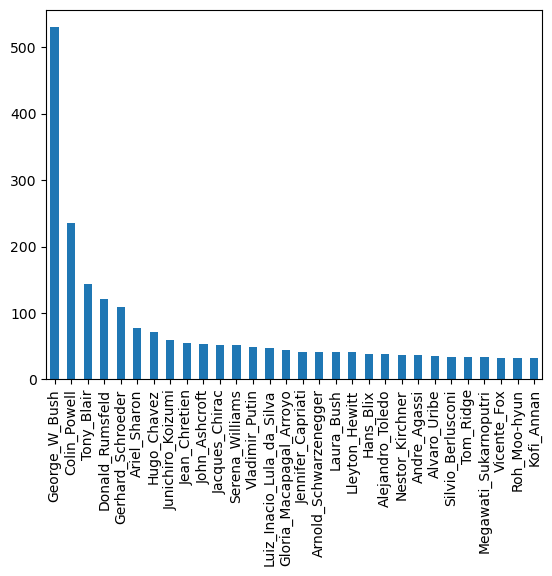

In [48]:
# Plot the above.
image_paths['name'].value_counts()[:30].plot(kind = 'bar')

In [49]:
# Determine how many entries have only 1 image per name.
img_counts = image_paths.groupby('name').count().image_path
single_img_count = sum(img_counts[img_counts == 1])
total_img_count = sum(img_counts)
print('single_img_count: {}'.format(single_img_count))
print('total_img_count: {}'.format(total_img_count))
print('% of images with only 1 image per person: {:.2f} %'.format(single_img_count / total_img_count * 100))

single_img_count: 4069
total_img_count: 13233
% of images with only 1 image per person: 30.75 %


In [76]:
lfw_train.loc[lfw_train['name'] == 'George_W_Bush']

,name,image_path
33,George_W_Bush,George_W_Bush/George_W_Bush_0112.jpg
45,George_W_Bush,George_W_Bush/George_W_Bush_0086.jpg
86,George_W_Bush,George_W_Bush/George_W_Bush_0004.jpg
134,George_W_Bush,George_W_Bush/George_W_Bush_0083.jpg
159,George_W_Bush,George_W_Bush/George_W_Bush_0372.jpg
...,...,...
10508,George_W_Bush,George_W_Bush/George_W_Bush_0356.jpg
10517,George_W_Bush,George_W_Bush/George_W_Bush_0382.jpg
10575,George_W_Bush,George_W_Bush/George_W_Bush_0429.jpg
10577,George_W_Bush,George_W_Bush/George_W_Bush_0399.jpg


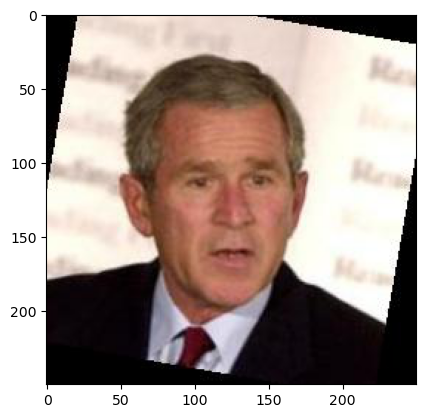

In [77]:
# Show a sample image to verify it.
img = Image.open(basepath + str(lfw_train.image_path[45]))
plt.imshow(img)

In [80]:
# Test a sample image above with out-of-the-box standard MTCNN algorithm to
# identify the face bounding box and the face distinct features (eyes, nose, mouth).
detector = MTCNN()
img = cv2.imread(basepath + str(lfw_train.image_path[45]))
result = detector.detect_faces(img)
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

1/1 [==============================] - 0s 113ms/step


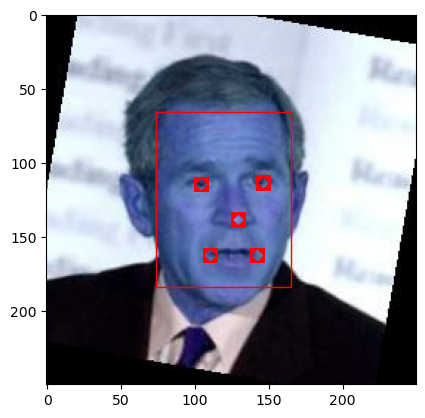

In [81]:
# Plot the image along with the detected bounding box and keypoints.

fig, ax = plt.subplots()
ax.imshow(img)

# Superimpose the bounding box.
bbox = patches.Rectangle(bounding_box[0:2], bounding_box[2], bounding_box[3],
                        linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(bbox)

# Superimpose the keypoints.
for key in keypoints:
    kp = patches.Rectangle(keypoints[key], 1, 1,
                          linewidth=10, edgecolor='r', facecolor='none')
    ax.add_patch(kp)

plt.show()

## Preliminary approach to classifying faces - George_W_Bush training

In [82]:
# Get a sample of records that are not George_W_Bush.
not_gw_bush = image_paths[image_paths.name!='George_W_Bush'].sample(530)
not_gw_bush

,name,image_path
1404,Donald_Rumsfeld,Donald_Rumsfeld/Donald_Rumsfeld_0077.jpg
3545,Mark_Cuban,Mark_Cuban/Mark_Cuban_0002.jpg
4344,Peter_Fitzgerald,Peter_Fitzgerald/Peter_Fitzgerald_0001.jpg
1047,Colin_Powell,Colin_Powell/Colin_Powell_0054.jpg
843,Celine_Dion,Celine_Dion/Celine_Dion_0001.jpg
...,...,...
2556,Jesse_Jackson,Jesse_Jackson/Jesse_Jackson_0006.jpg
695,Brian_Pavlich,Brian_Pavlich/Brian_Pavlich_0001.jpg
2521,Jennifer_Rodriguez,Jennifer_Rodriguez/Jennifer_Rodriguez_0002.jpg
3962,Monica_Seles,Monica_Seles/Monica_Seles_0002.jpg


In [83]:
# Replace the true name for each of those entries generically as 'not_George'
not_gw_bush.name = 'not_George'
not_gw_bush

,name,image_path
1404,not_George,Donald_Rumsfeld/Donald_Rumsfeld_0077.jpg
3545,not_George,Mark_Cuban/Mark_Cuban_0002.jpg
4344,not_George,Peter_Fitzgerald/Peter_Fitzgerald_0001.jpg
1047,not_George,Colin_Powell/Colin_Powell_0054.jpg
843,not_George,Celine_Dion/Celine_Dion_0001.jpg
...,...,...
2556,not_George,Jesse_Jackson/Jesse_Jackson_0006.jpg
695,not_George,Brian_Pavlich/Brian_Pavlich_0001.jpg
2521,not_George,Jennifer_Rodriguez/Jennifer_Rodriguez_0002.jpg
3962,not_George,Monica_Seles/Monica_Seles_0002.jpg


In [84]:
# Based on the 530 samples collected, collect the dataset that consists of George_W_Bush and not_George. 
gwb_data = pd.concat([image_paths[image_paths.name=="George_W_Bush"], not_gw_bush])
gwb_data

,name,image_path
1871,George_W_Bush,George_W_Bush/George_W_Bush_0001.jpg
1871,George_W_Bush,George_W_Bush/George_W_Bush_0002.jpg
1871,George_W_Bush,George_W_Bush/George_W_Bush_0003.jpg
1871,George_W_Bush,George_W_Bush/George_W_Bush_0004.jpg
1871,George_W_Bush,George_W_Bush/George_W_Bush_0005.jpg
...,...,...
2556,not_George,Jesse_Jackson/Jesse_Jackson_0006.jpg
695,not_George,Brian_Pavlich/Brian_Pavlich_0001.jpg
2521,not_George,Jennifer_Rodriguez/Jennifer_Rodriguez_0002.jpg
3962,not_George,Monica_Seles/Monica_Seles_0002.jpg


In [85]:
len(image_paths)

13233

In [86]:
# Split gwb_data dataset into test, train and validation datasets.
gwb_train, gwb_test = train_test_split(gwb_data, test_size=0.2)
gwb_train, gwb_val = train_test_split(gwb_train, test_size=0.2)
print('Train: {}, Val: {}, Test: {}'.format(gwb_train.shape, gwb_val.shape, gwb_test.shape))

Train: (678, 2), Val: (170, 2), Test: (212, 2)


In [87]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [88]:
gwb_classifier = Sequential()

# use a 2x2 kernel for convolution, input is 250x250x3 with 3-channel because color image
gwb_classifier.add(Conv2D(32, (3, 3), input_shape = (250, 250, 3), activation = 'relu'))

# pooling to reduce dimension of convolution layers output
gwb_classifier.add(MaxPooling2D(pool_size = (2, 2)))

gwb_classifier.add(Flatten())

# feed flattened output into a fully-connected layer
gwb_classifier.add(Dense(units = 128, activation = 'relu'))

# final output classifies as either 'Bush' or 'non-Bush'
gwb_classifier.add(Dense(units = 1, activation = 'sigmoid'))

# compile the model
gwb_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Prep the images before running the model.

In [93]:
dest_dir = '../../data/working/'

def directory_copier(data, dir_name):
    count = 0
    for image in data.image_path:
        # create top directory
        if not os.path.exists(os.path.join(dest_dir, dir_name)):
            shutil.os.mkdir(os.path.join(dest_dir, dir_name))
        
        data_type = data[data['image_path'] == image]['name']
        data_type = str(list(data_type)[0])
        if not os.path.exists(os.path.join(dest_dir, dir_name, data_type)):
            shutil.os.mkdir(os.path.join(dest_dir, dir_name, data_type))
        path_from = os.path.join(basepath, image)
        path_to = os.path.join(dest_dir, dir_name, data_type)
        # print(path_to)
        shutil.copy(path_from, path_to)
        # print('Moved {} to {}'.format(image,path_to))
        count += 1
        
    print('Copied {} images to {} folder.'.format(count, dir_name))

In [94]:
directory_copier(gwb_train, 'gwb_train/')

Copied 678 images to gwb_train/ folder.


In [95]:
directory_copier(gwb_val, 'gwb_val/')

Copied 170 images to gwb_val/ folder.


In [96]:
directory_copier(gwb_test, 'gwb_test/')

Copied 212 images to gwb_test/ folder.


### Train the model

In [97]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             horizontal_flip = True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

basedir = dest_dir

gwb_training_set = train_datagen.flow_from_directory(basedir + 'gwb_train/',
                                                     target_size = (250, 250),
                                                     batch_size = 32,
                                                     class_mode = 'binary')

gwb_val_set = test_datagen.flow_from_directory(basedir + 'gwb_val/',
                                               target_size = (250, 250),
                                               batch_size = 32,
                                               class_mode = 'binary')

gwb_test_set = test_datagen.flow_from_directory(basedir + 'gwb_test/',
                                                target_size = (250, 250),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 678 images belonging to 2 classes.
Found 170 images belonging to 2 classes.
Found 212 images belonging to 2 classes.


In [115]:
steps_per_epoch = len(gwb_train)//16
steps_per_epoch

42

In [135]:
batch_size = 32
steps_per_epoch = len(gwb_train) // batch_size
# Set steps per epoch to the number of training images (678).
#steps_per_epoch=678
print('steps_per_epoch: {}'.format(steps_per_epoch))

gwb_history = gwb_classifier.fit(gwb_training_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=8,
                                 validation_data=gwb_val_set,
                                 validation_steps=100)

steps_per_epoch: 21
Epoch 1/8
21/21 [==============================] - 14s 651ms/step - loss: 0.0663 - accuracy: 0.9737 - val_loss: 0.2189 - val_accuracy: 0.9412
Epoch 2/8
21/21 [==============================] - 12s 555ms/step - loss: 0.0661 - accuracy: 0.9737
Epoch 3/8
21/21 [==============================] - 13s 604ms/step - loss: 0.0704 - accuracy: 0.9783
Epoch 4/8
21/21 [==============================] - 13s 592ms/step - loss: 0.0763 - accuracy: 0.9721
Epoch 5/8
21/21 [==============================] - 13s 588ms/step - loss: 0.1324 - accuracy: 0.9551
Epoch 6/8
21/21 [==============================] - 13s 627ms/step - loss: 0.1038 - accuracy: 0.9598
Epoch 7/8
21/21 [==============================] - 15s 703ms/step - loss: 0.0928 - accuracy: 0.9690
Epoch 8/8
21/21 [==============================] - 14s 658ms/step - loss: 0.0621 - accuracy: 0.9768


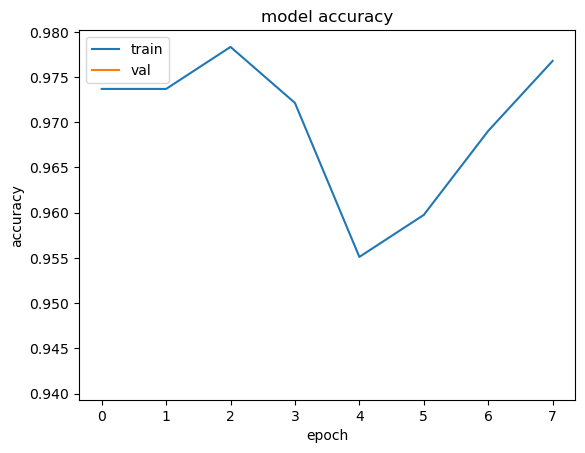

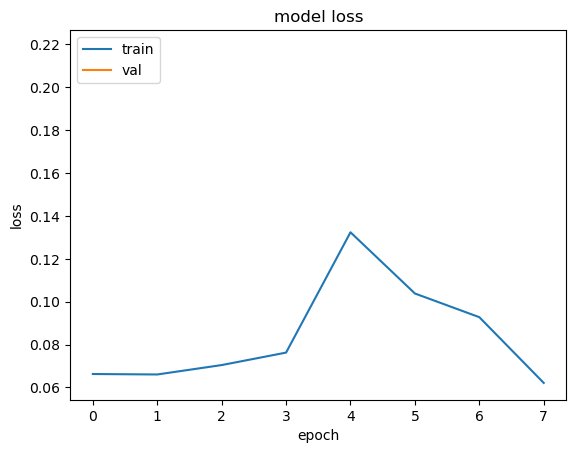

In [136]:
plt.plot(gwb_history.history['accuracy'])
plt.plot(gwb_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(gwb_history.history['loss'])
plt.plot(gwb_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()